In [1]:
import numpy as np
import random

## import Matpolt with PyQt4 Backend
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Parameters
learning_rate = 0.001
training_epochs = 2000
display_step = 50

In [3]:
# Training Data
train_X = np.asarray([3.3, 4.4, 5.5, 6.71 ,6.93,
                         4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654,
                         9.27, 3.1, 12.21, 6.12, 8.24])
train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694,
                         1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42,
                         2.94, 1.3, 3.2, 1.6, 1.8])
n_samples = train_X.shape[0]

print(train_X.shape)
print(train_Y.shape)

(20,)
(20,)


In [4]:
W = np.random.randn()

In [5]:
loss_history = []
for epoch in range(training_epochs):
    # L2 Loss
    loss = 0
    for (x, y) in zip(train_X, train_Y):
        pred_y = np.dot(x, W)
        loss += (pred_y - y) ** 2
    loss /= (2*n_samples)
    loss_history.append(loss)
    
    # Gradient Descent
    dW = -np.dot(x.transpose(), loss) / n_samples
    W = W - learning_rate * dW
        
    if epoch % display_step == 0:
        print("Epoch : ", epoch+1, "loss= ", loss)
        
print("Optimization Finished!!")

Epoch :  1 loss=  111.749043269
Epoch :  51 loss=  25.1684448183
Epoch :  101 loss=  10.8902544802
Epoch :  151 loss=  6.06878003412
Epoch :  201 loss=  3.87535544892
Epoch :  251 loss=  2.69584980194
Epoch :  301 loss=  1.98935966862
Epoch :  351 loss=  1.53300613389
Epoch :  401 loss=  1.22129012655
Epoch :  451 loss=  0.999013154787
Epoch :  501 loss=  0.835014361826
Epoch :  551 loss=  0.710619607768
Epoch :  601 loss=  0.614084411404
Epoch :  651 loss=  0.537722347884
Epoch :  701 loss=  0.476331846226
Epoch :  751 loss=  0.426291276123
Epoch :  801 loss=  0.385016498373
Epoch :  851 loss=  0.350623960319
Epoch :  901 loss=  0.321714910983
Epoch :  951 loss=  0.29723341355
Epoch :  1001 loss=  0.276370663637
Epoch :  1051 loss=  0.258499130777
Epoch :  1101 loss=  0.243126360368
Epoch :  1151 loss=  0.229862011142
Epoch :  1201 loss=  0.218393973836
Epoch :  1251 loss=  0.208470829693
Epoch :  1301 loss=  0.199888806229
Epoch :  1351 loss=  0.192481970858
Epoch :  1401 loss=  0.18

In [6]:
pred_Y = []
for i in range(n_samples):
    pred_Y.append(np.dot(train_X[i], W))

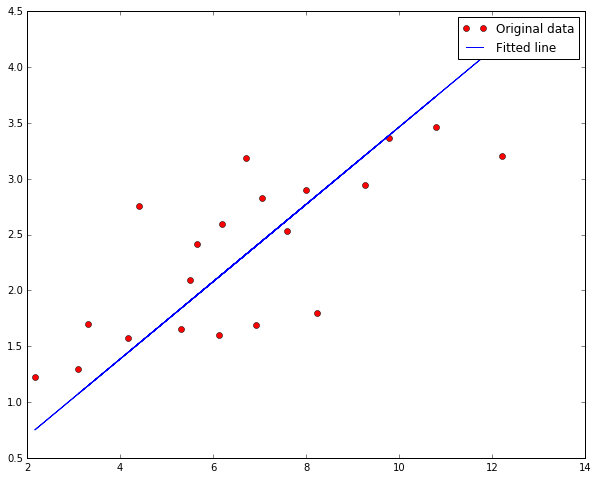

In [7]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, pred_Y, label='Fitted line')
plt.legend()
plt.show()

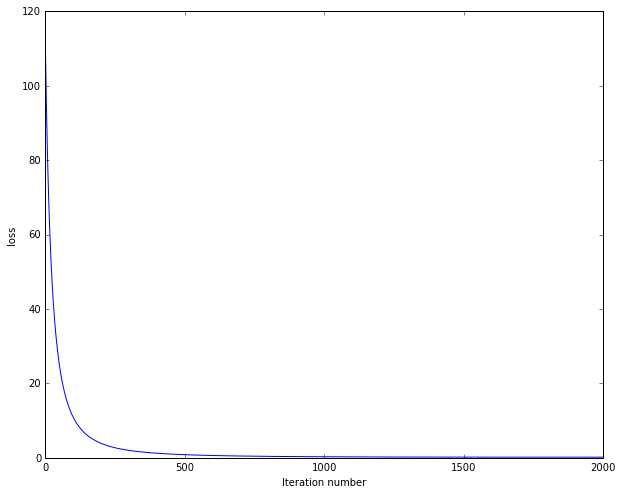

In [8]:
plt.plot(loss_history)
plt.xlabel("Iteration number")
plt.ylabel("loss")
plt.show()